## K-means & Hierarchical clustering 

##### Data pre_processing

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("CC GENERAL.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace = True)

In [6]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean() ,inplace = True)

In [7]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
data.drop('CUST_ID', inplace=True, axis=1)

In [10]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
from sklearn import preprocessing

# data standardization   
standardized_data= preprocessing.scale(data)

# data normalization
normalized_data = preprocessing.normalize(standardized_data)

In [12]:
new_data = pd.DataFrame(data=normalized_data,columns=data.columns)
new_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-0.132519,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,0.024959,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-0.028803,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,0.000000,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-0.112306,-0.222064,0.152400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146893,0.103128,-0.066344,-0.071050,-0.026403,-0.092916,0.252770,-0.135091,0.234852,-0.134432,-0.094764,-0.069751,-0.191180,-0.096784,-0.069640,0.235672,-0.820660
8946,-0.151521,0.105735,-0.067173,-0.072846,-0.025067,-0.095266,0.259162,-0.138507,0.240791,-0.137832,-0.097161,-0.071515,-0.196014,-0.102738,0.000000,-0.107259,-0.841413
8947,-0.156974,-0.039324,-0.085222,-0.075675,-0.062521,-0.098965,0.181181,-0.143885,0.161230,-0.143183,-0.100933,-0.082821,-0.203625,-0.120978,-0.071123,0.069795,-0.874082
8948,-0.154320,-0.038411,-0.097240,-0.073918,-0.094139,-0.093057,-0.253016,-0.140545,-0.189902,0.032623,-0.037897,-0.122556,-0.227357,-0.120224,-0.071842,0.068175,-0.853792


In [13]:
model = AgglomerativeClustering(n_clusters=4,affinity = "euclidean", linkage = "complete")

In [14]:
labels = model.fit_predict(new_data)

In [15]:
agglomerative = pd.DataFrame(labels)

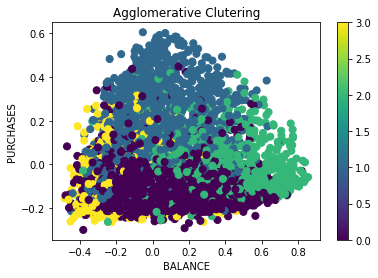

In [16]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (new_data['BALANCE'] , new_data['PURCHASES'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)
plt.show()

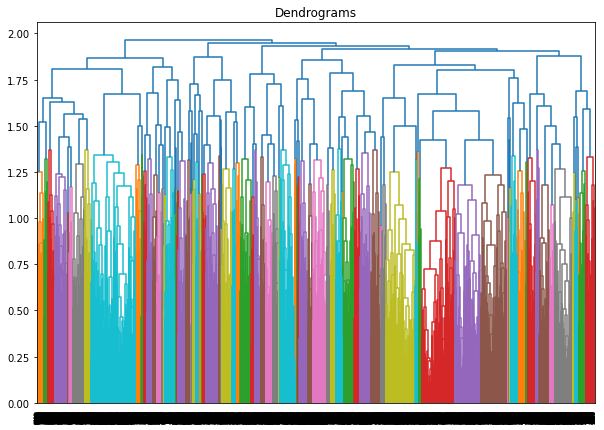

In [17]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(new_data, method="complete"))

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit_predict(new_data)

array([3, 1, 0, ..., 2, 3, 0], dtype=int32)

In [19]:
labels = pd.DataFrame(kmeans.labels_)
labels[0]

0       3
1       1
2       0
3       3
4       3
       ..
8945    2
8946    2
8947    2
8948    3
8949    0
Name: 0, Length: 8950, dtype: int32

In [20]:
labels[0].values

array([3, 1, 0, ..., 2, 3, 0], dtype=int32)

In [21]:
SSE = []
K = range(1,15)
for k in K:
    kms_k = KMeans(n_clusters = k, random_state = 0)
    kms_k.fit(new_data)
    SSE.append(kms_k.inertia_)
print(len(SSE))

14


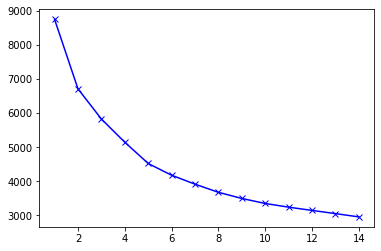

In [22]:
fig =plt.figure()
plt.plot(K,SSE,'bx-')
plt.show()


#### By refering to the plot, the best k value is located as the elbow position. So, it's 5.

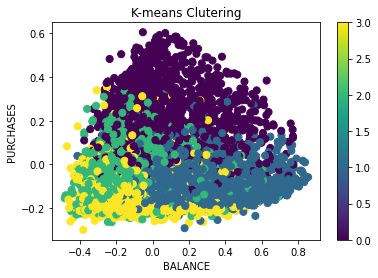

In [23]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (new_data['BALANCE'] , new_data['PURCHASES'] , c = labels[0], s=50)
ax.set_title("K-means Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)
plt.show()

#### Both methods splitted the raw data to four differents clusters. But for the first method, agglomerative clustering, the plot showed that the split was more accurate comparing to the second plot of Kmeans clustering. This is because, points belonging to each cluster were closer and more organized which made them locate at a specific part of the figure. Otherwise, for the kmeans plot, points from a different cluster appeared (for example yellow cluster) at others clusters locations.  

## Bonus question
#### Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [24]:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(new_data, kmeans.labels_, metric='euclidean')
print(score)

0.20669973999392863
